<a href="https://colab.research.google.com/github/sendmail123/DataScience/blob/master/CNN_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install tensorflow-gpu==2.0.0.alpha0

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
%matplotlib inline
tf.__version__

'2.0.0-alpha0'

In [0]:
class_names = ['airplane','automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
[X_train,y_train],[X_test,y_test] = cifar10.load_data()

In [0]:
X_train = X_train/255.0

In [17]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
X_test=X_test/255.0

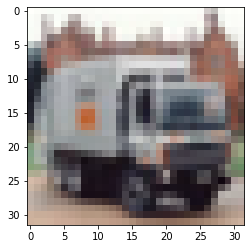

In [19]:
plt.imshow(X_test[11])

In [0]:
model = tf.keras.Sequential()

In [0]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same', activation='relu',input_shape=[32,32,3]))

In [0]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [0]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))

In [0]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [0]:
model.add(tf.keras.layers.Flatten())

In [0]:
model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [0]:
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)         

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)         

In [44]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
50000/50000 [==============================] - 19s 372us/sample - loss: 1.4032 - sparse_categorical_accuracy: 0.4923
Epoch 2/5
50000/50000 [==============================] - 13s 251us/sample - loss: 0.9272 - sparse_categorical_accuracy: 0.6772
Epoch 3/5
50000/50000 [==============================] - 12s 247us/sample - loss: 0.7647 - sparse_categorical_accuracy: 0.7329
Epoch 4/5
50000/50000 [==============================] - 13s 252us/sample - loss: 0.6578 - sparse_categorical_accuracy: 0.7713
Epoch 5/5
50000/50000 [==============================] - 12s 249us/sample - loss: 0.5730 - sparse_categorical_accuracy: 0.7997


In [45]:
test_loss,test_accuracy =model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 124us/sample - loss: 0.7259 - sparse_categorical_accuracy: 0.7593
